In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import torch
from torch import nn
from torch.nn.parameter import Parameter
import torch.nn.functional as F

import matplotlib.pyplot as plt
import time
import numpy as np

# for plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from ph3 import *
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from collections import Counter
import torch


In [3]:
if torch.cuda.is_available:
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

# data type and device for torch.tensor
to_float = {'dtype': torch.float, 'device': 'cpu'}
to_float_cuda = {'dtype': torch.float, 'device': 'cuda'}
to_double = {'dtype': torch.double, 'device': 'cpu'}
to_double_cuda = {'dtype': torch.double, 'device': 'cuda'}
to_long = {'dtype': torch.long, 'device': 'cpu'}
to_long_cuda = {'dtype': torch.long, 'device': 'cuda'}

Good to go!


In [4]:
# Configuration
image_size = (112, 112)
data_paht = "./dataset/archive/images"
captions_path = "./dataset/archive/captions.txt"
data_dict_path = "./dataset/image_captioning_dataset.pt"

data_dict = load_data(data_dict_path, captions_path, data_paht, image_size)

The file './dataset/image_captioning_dataset.pt' does not exist. Creating a new dataset...
Dataset created successfully.


In [9]:
num_train = len(data_dict['train_images'])
num_val = len(data_dict['val_images'])
print(f'num_train: {num_train}')
print(f'num_val: {num_val}')

num_train: 6472
num_val: 1619


In [21]:
data_dict['train_images'].shape

torch.Size([6472, 3, 112, 112])

In [23]:
data_dict['train_captions'].shape

torch.Size([6472, 5, 40])

In [26]:
len(data_dict["vocab"]["idx_to_token"])

8908

We have 6,472 lists of captions. 

- Each list contains 5 captions.  
- Each caption consists of 40 tokens (with padding).  
- Each token is represented as a vector of size 8,908 (one-hot encoding).  


In [24]:
data_dict['train_captions'][0]

tensor([[   1,  213, 2100, 4702, 5689, 1188, 5004, 5491, 8138, 1188, 7690,  163,
            2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [   1,  213, 3127, 4619, 5869, 1467, 1188, 3524, 5004, 5457, 1188, 7690,
         4541, 1337, 1410, 8793, 6027,  163,    2,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [   1,  314, 1342, 8716, 3127, 4049, 8260, 4954,    2,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0],
        [   1, 1066, 1821, 1342, 8716, 3127, 4702, 2168, 1188, 5004, 5456, 1188,
         2802,  163,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

`start = 1`,
`end = 2`,
`pad = 0`

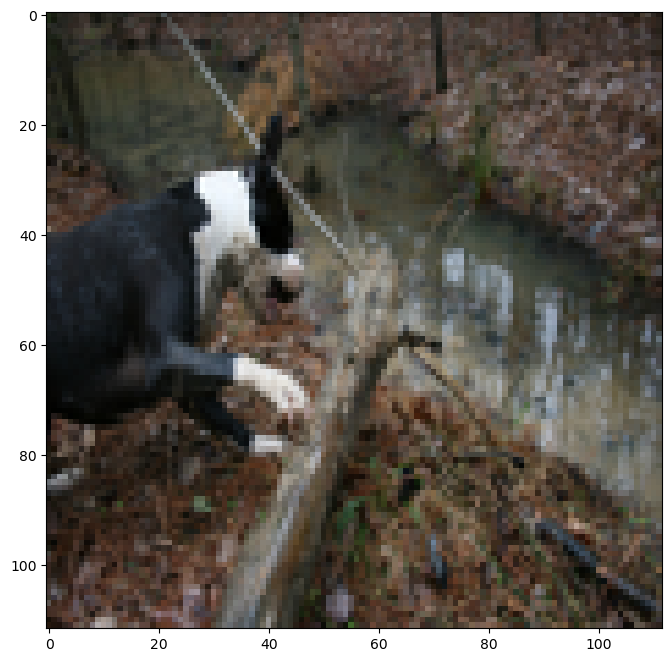

In [22]:
plt.imshow(data_dict['train_images'][0].permute(1, 2, 0))

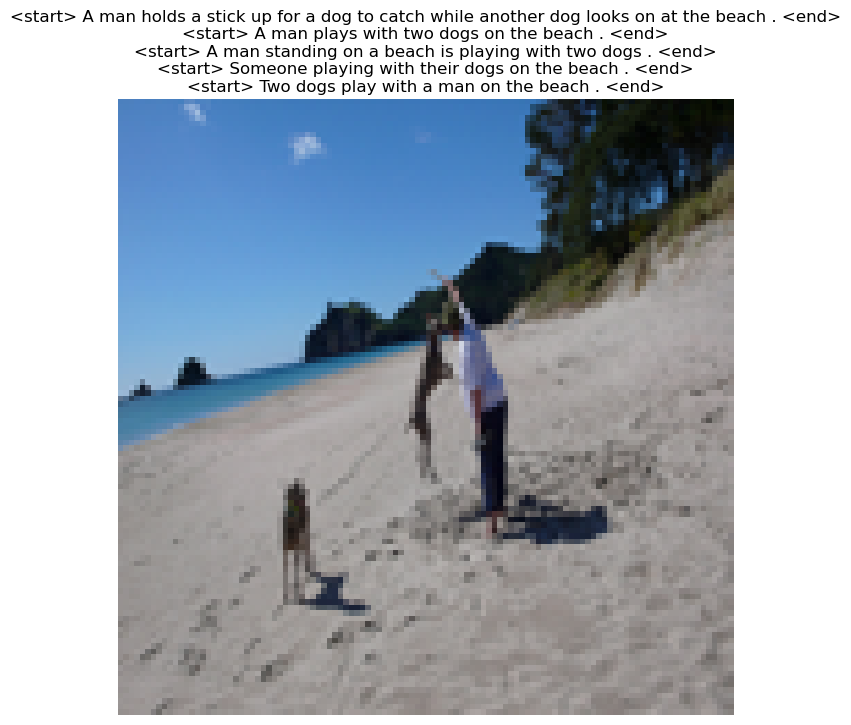

In [25]:
# Sample a minibatch and show the reshaped 112x112 images and captions
batch_size = 1

sample_idx = torch.randint(0, num_train, (batch_size,))
sample_images = data_dict['train_images'][sample_idx]
sample_captions = data_dict['train_captions'][sample_idx]
for i in range(batch_size):
  plt.imshow(sample_images[i].permute(1, 2, 0))
  plt.axis('off')
  caption_str = decode_captions(sample_captions[i], data_dict['vocab']['idx_to_token'])
  caption_str = "\n".join(caption_str)
  plt.title(caption_str)
  plt.show()